In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
def noisemodel(frames, sigma, k, s):
    dim1, dim2, nframes = frames.shape

    # Convert frames to float for noise addition
    noisy = frames.astype(np.float64)

    # Poisson Noise
    np_noise = np.random.poisson(k * noisy) - k * noisy

    # Gaussian Noise
    ng = sigma * np.random.randn(dim1, dim2, nframes)

    # Combine noises
    noisy += np_noise + ng

    # Impulsive noise
    X = np.random.rand(dim1, dim2, nframes)
    noisy[X < s / 200] = 0  # Set impulsive noise to 0
    noisy[X > 1 - s / 200] = 255  # Set impulsive noise to 255

    # Cast back to uint8
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)

    return noisy

In [8]:
vid = cv2.VideoCapture('video.mp4')
frames = []
while vid.isOpened():
    ret, frame = vid.read()
    if ret:
        # Convert to grayscale and flatten
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(frame_gray)
    else:
        break
vid.release()
frames = np.array(frames)

In [9]:
# apply noise model
noisy = noisemodel(frames, 10, 0.01, 5)

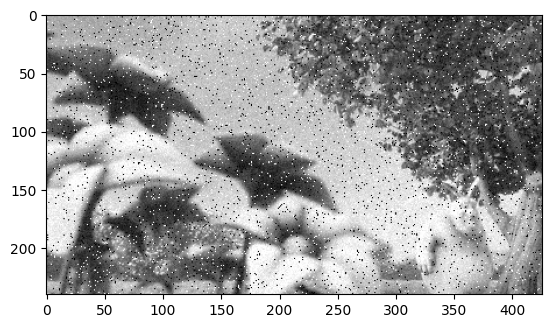

In [10]:
# plot first noisy frame
plt.imshow(noisy[0], cmap='gray')

In [11]:
np.save('noisy.npy', noisy)